In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
df = pd.read_csv('/content/train.csv')

In [3]:
#preserving original data
df1 = df.copy()

In [4]:
#displaying entries in the beginning of data
df.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.788,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical


In [5]:
#displaying number of rows and columns in data
df.shape

(15681, 18)

In [6]:
#to get basic details of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [7]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


In [8]:
#checking for number of unique values in each column
df.nunique()

instance_id          15681
track_name           14799
popularity           12743
acousticness         15660
danceability         15125
duration_ms          14011
energy               14371
instrumentalness      9950
key                     12
liveness             15681
loudness             10473
voice_gender             3
mode                     3
speechiness          15655
tempo                12332
musician_category        3
valence              15003
music_genre              7
dtype: int64

In [9]:
#checking for the count of unique values in the column mode
df['mode'].value_counts()

Major    9210
Minor    5357
?        1079
Name: mode, dtype: int64

In [10]:
#replacing ? in tempo column with NaN
df['tempo'] = df['tempo'].replace('?',np.NaN)

In [11]:
#replacing ? in mode column with NaN
df['mode'] = df['mode'].replace('?',np.NaN)

In [12]:
#checking for the number of null values in each column
df.isna().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                 1114
speechiness            26
tempo                1476
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [13]:
df['tempo'] = df['tempo'].astype(float)

In [14]:
#measures of categorical variables
df.describe(include = 'object')

,instance_id,track_name,key,voice_gender,mode,musician_category,music_genre
count,15681,15681,15681,14916,14567,14321,15681
unique,15681,14799,12,3,2,3,7
top,MSC_83537.0,Smile,Scale C,Female,Major,Band,Classical
freq,1,7,1771,5050,9210,4843,3990


In [15]:
#dropping the column instance_id because it is different for every entries
df.drop(['instance_id'],axis = 1,inplace = True)

In [16]:
df.head()

,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.788,Band,0.598965,Jazz
1,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,Scale A,0.174655,-13.716,Male,NaN,0.039949,NaN,Band,0.357194,Jazz
2,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018,Band,0.635525,Rap
3,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,NaN,Duet,0.983750,Rock
4,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183,Band,0.074412,Classical


In [17]:
df.columns

Index(['track_name', 'popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'voice_gender', 'mode', 'speechiness', 'tempo',
       'musician_category', 'valence', 'music_genre'],
      dtype='object')

In [18]:
#seperating numerical columns
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']

In [19]:
numerical_features

['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [20]:
#seperating categorical columns
categorical_features = [features for features in df.columns if df[features].dtypes =='O']

In [21]:
categorical_features

['track_name',
 'key',
 'voice_gender',
 'mode',
 'musician_category',
 'music_genre']

##Univariate analysis

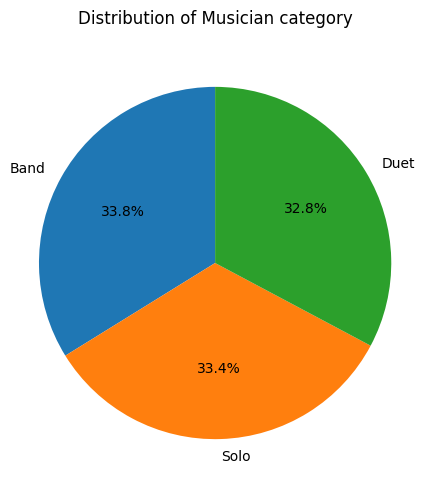

In [22]:
musician_category_count=df['musician_category'].value_counts()

fig,ax=plt.subplots(figsize=(5,6))
ax.pie(musician_category_count,labels=musician_category_count.index,autopct='%1.1f%%',startangle=90)
ax.set_title("Distribution of Musician category")
ax.axis('equal')
plt.show()

In [23]:
#There is approximately equal proportion of musician categories in the data

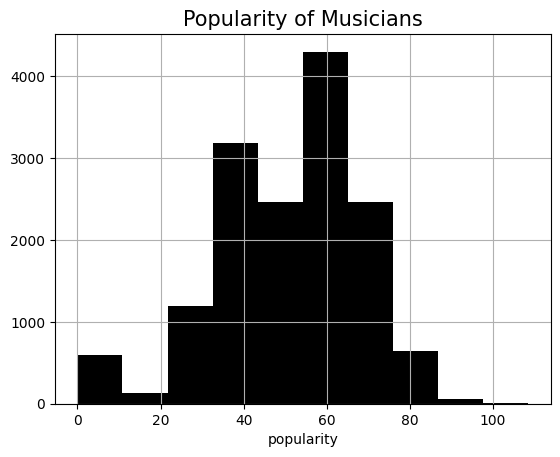

In [24]:
plt.hist(df['popularity'], color = 'black')
plt.title('Popularity of Musicians', fontsize = 15)
plt.xlabel('popularity')
plt.grid()
plt.show()

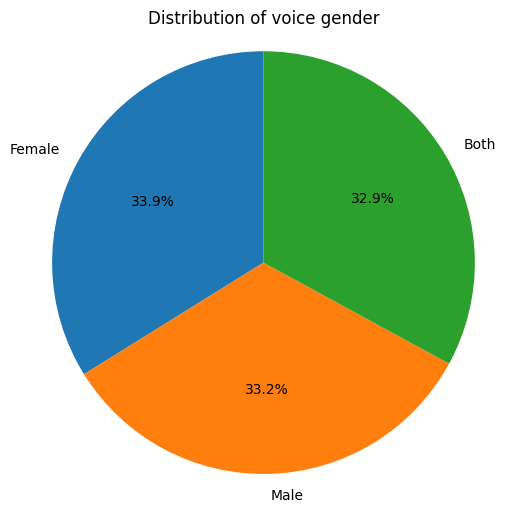

In [25]:
gen_count=df['voice_gender'].value_counts()
gen_count

fig,ax=plt.subplots(figsize=(6,6))
ax.pie(gen_count,labels=gen_count.index,autopct='%1.1f%%',startangle=90)
ax.set_title("Distribution of voice gender")
ax.axis("equal")
plt.show()

In [26]:
#There is approximately equal proportion of duet and solos by male and female

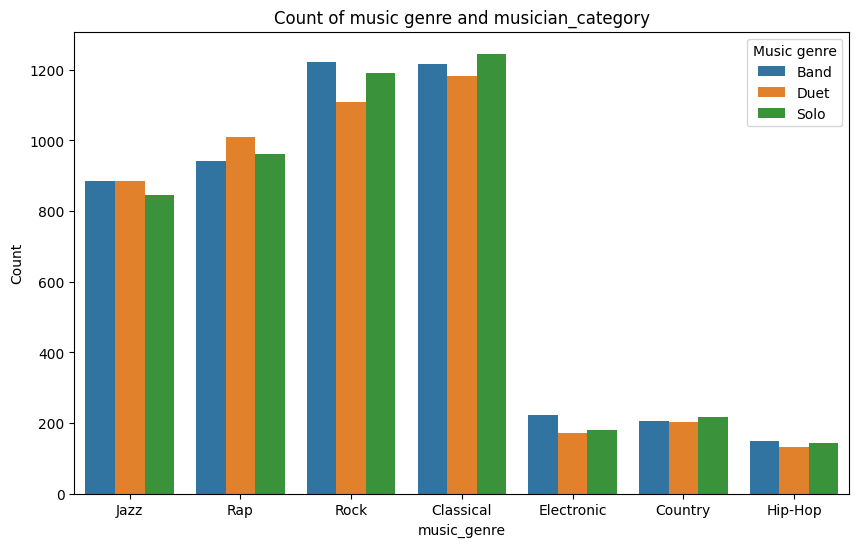

In [27]:
#Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='music_genre', hue='musician_category', data=df)
plt.xlabel('music_genre')
plt.ylabel('Count')
plt.title('Count of music genre and musician_category')
plt.legend(title='Music genre')
plt.show()

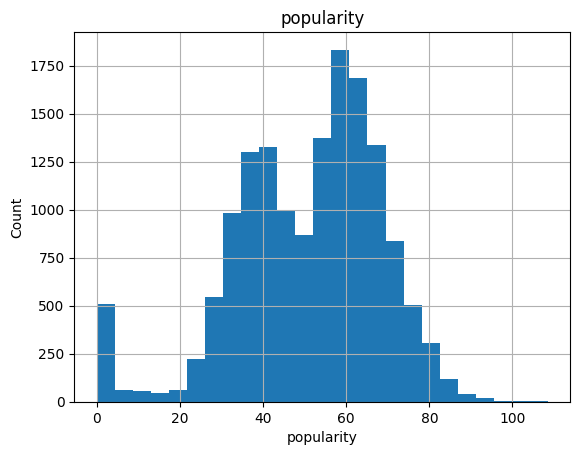

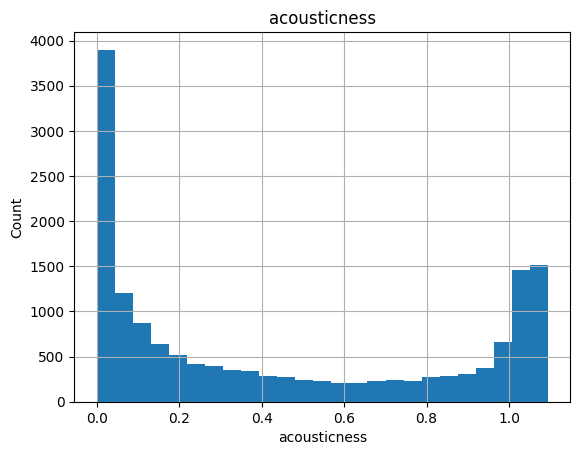

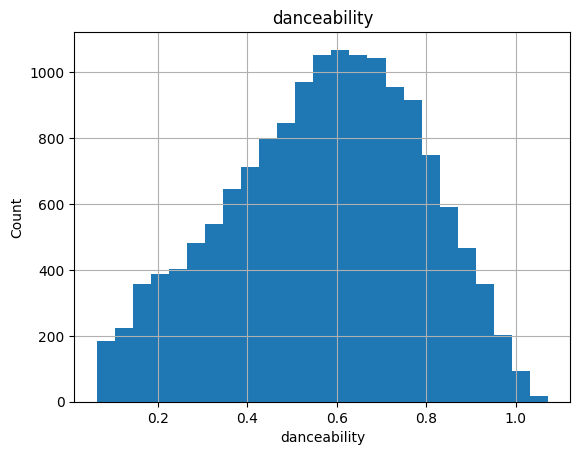

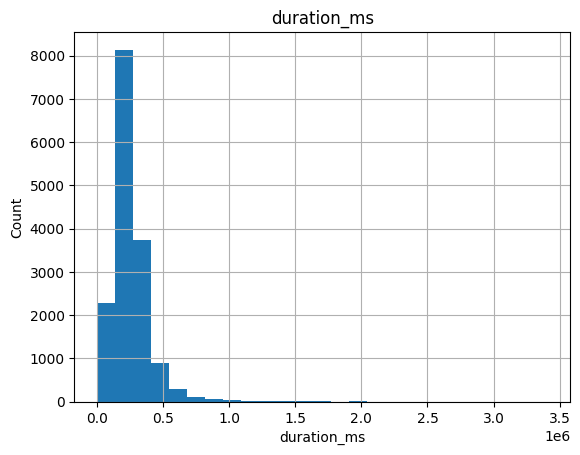

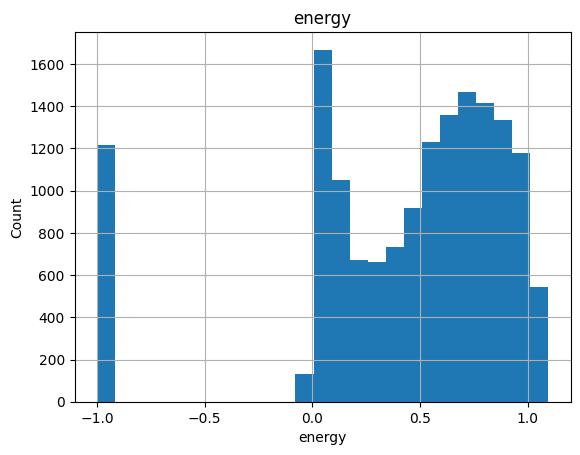

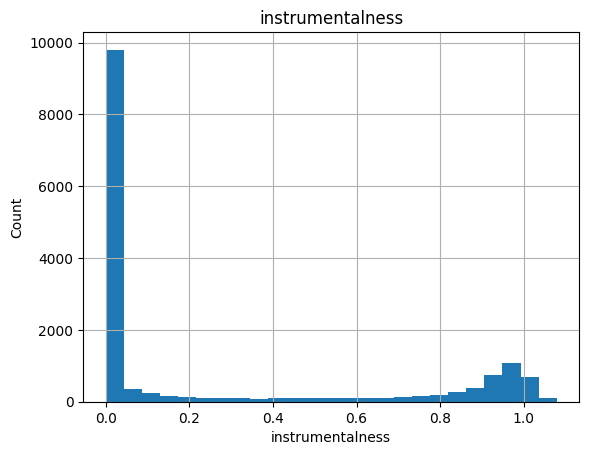

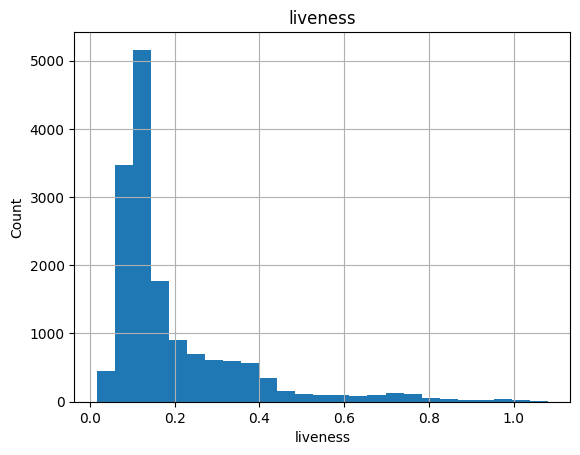

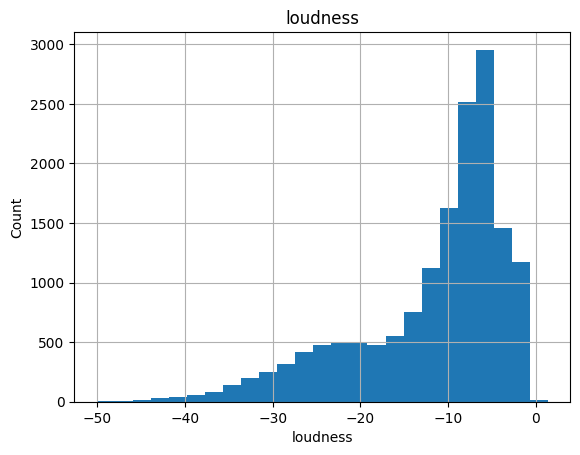

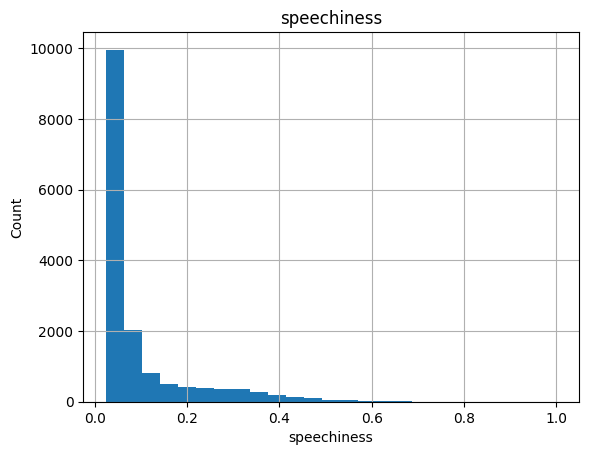

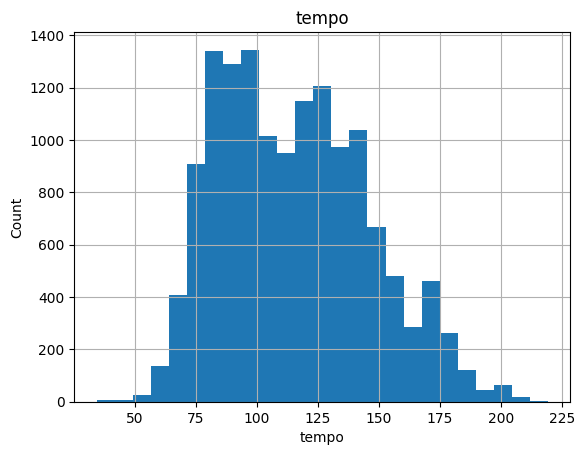

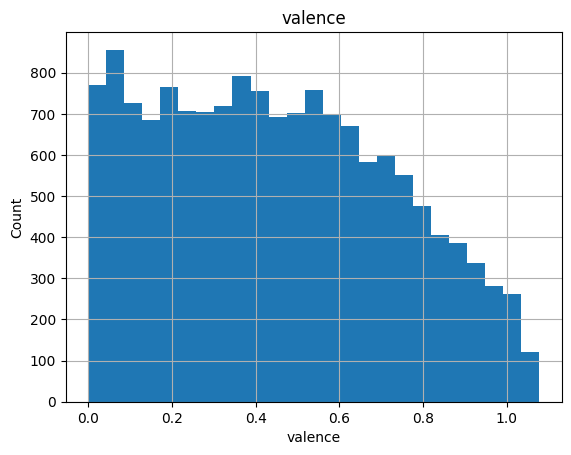

In [28]:
for feature in numerical_features:
    data = df.copy()
    data[feature].hist(bins  = 25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

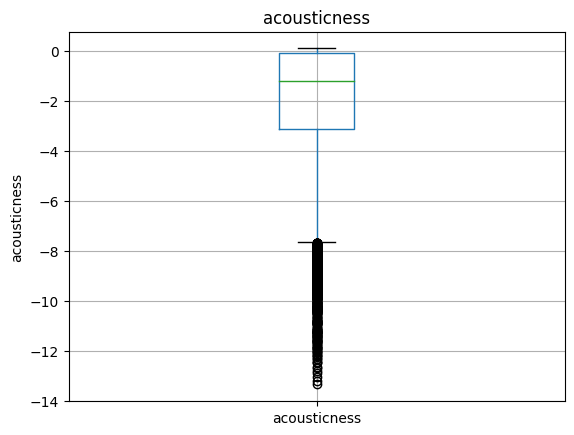

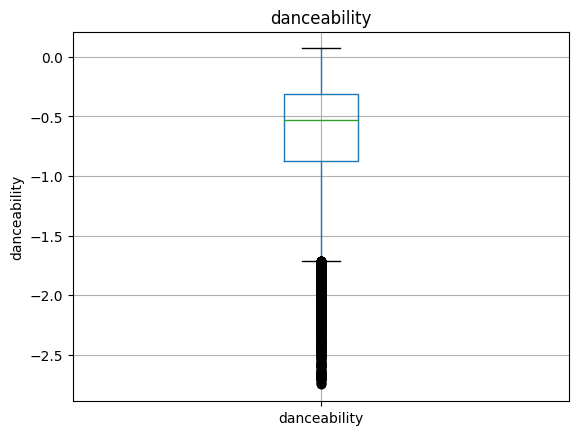

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


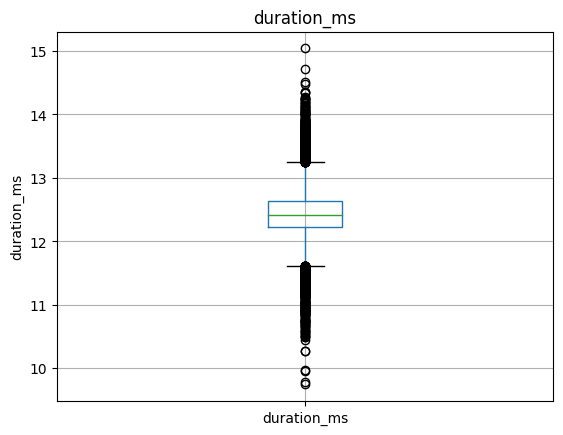

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


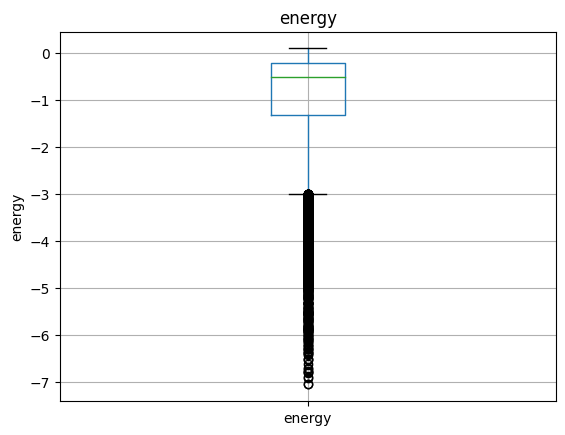

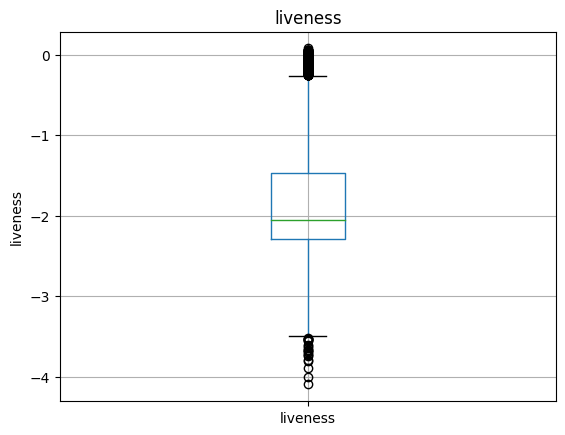

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


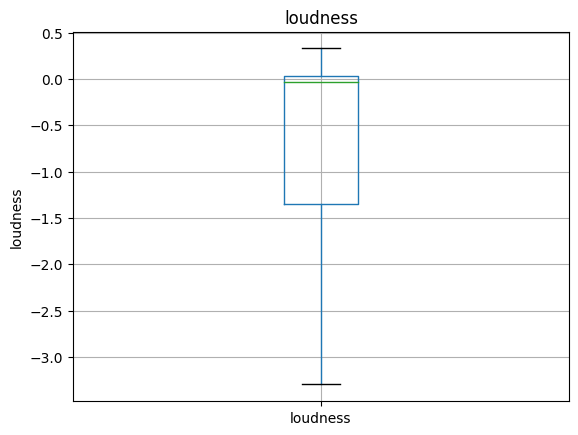

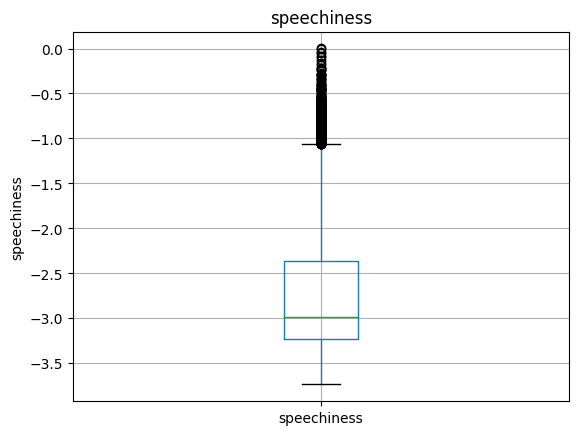

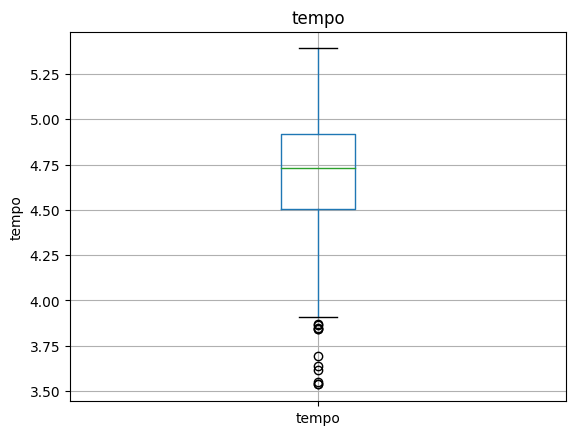

In [29]:
for feature in numerical_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

Null Value Handling

In [30]:
# replacing null values with median in numerical columns
for feature in numerical_features:
    median = df[feature].median()
    df[feature].fillna(median,inplace = True)

In [31]:
#replacing null values with mode in categorical columns
for feature in categorical_features:
    mode = df[feature].mode()
    df[feature].fillna(mode,inplace = True)

In [32]:
df.isna().sum()

track_name              0
popularity              0
acousticness            0
danceability            0
duration_ms             0
energy                  0
instrumentalness        0
key                     0
liveness                0
loudness                0
voice_gender          764
mode                 1114
speechiness             0
tempo                   0
musician_category    1360
valence                 0
music_genre             0
dtype: int64

In [33]:
#creating a seperate category missing for null values in voice_gender,mode and musician_category
for feature in categorical_features:
    df[feature].fillna('missing',inplace = True)

In [34]:
df.isna().sum()

track_name           0
popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
music_genre          0
dtype: int64

In [35]:
df2 = df.drop(['track_name',
 'key',
 'voice_gender',
 'mode',
 'musician_category',
 'music_genre'
 ],axis = 1)

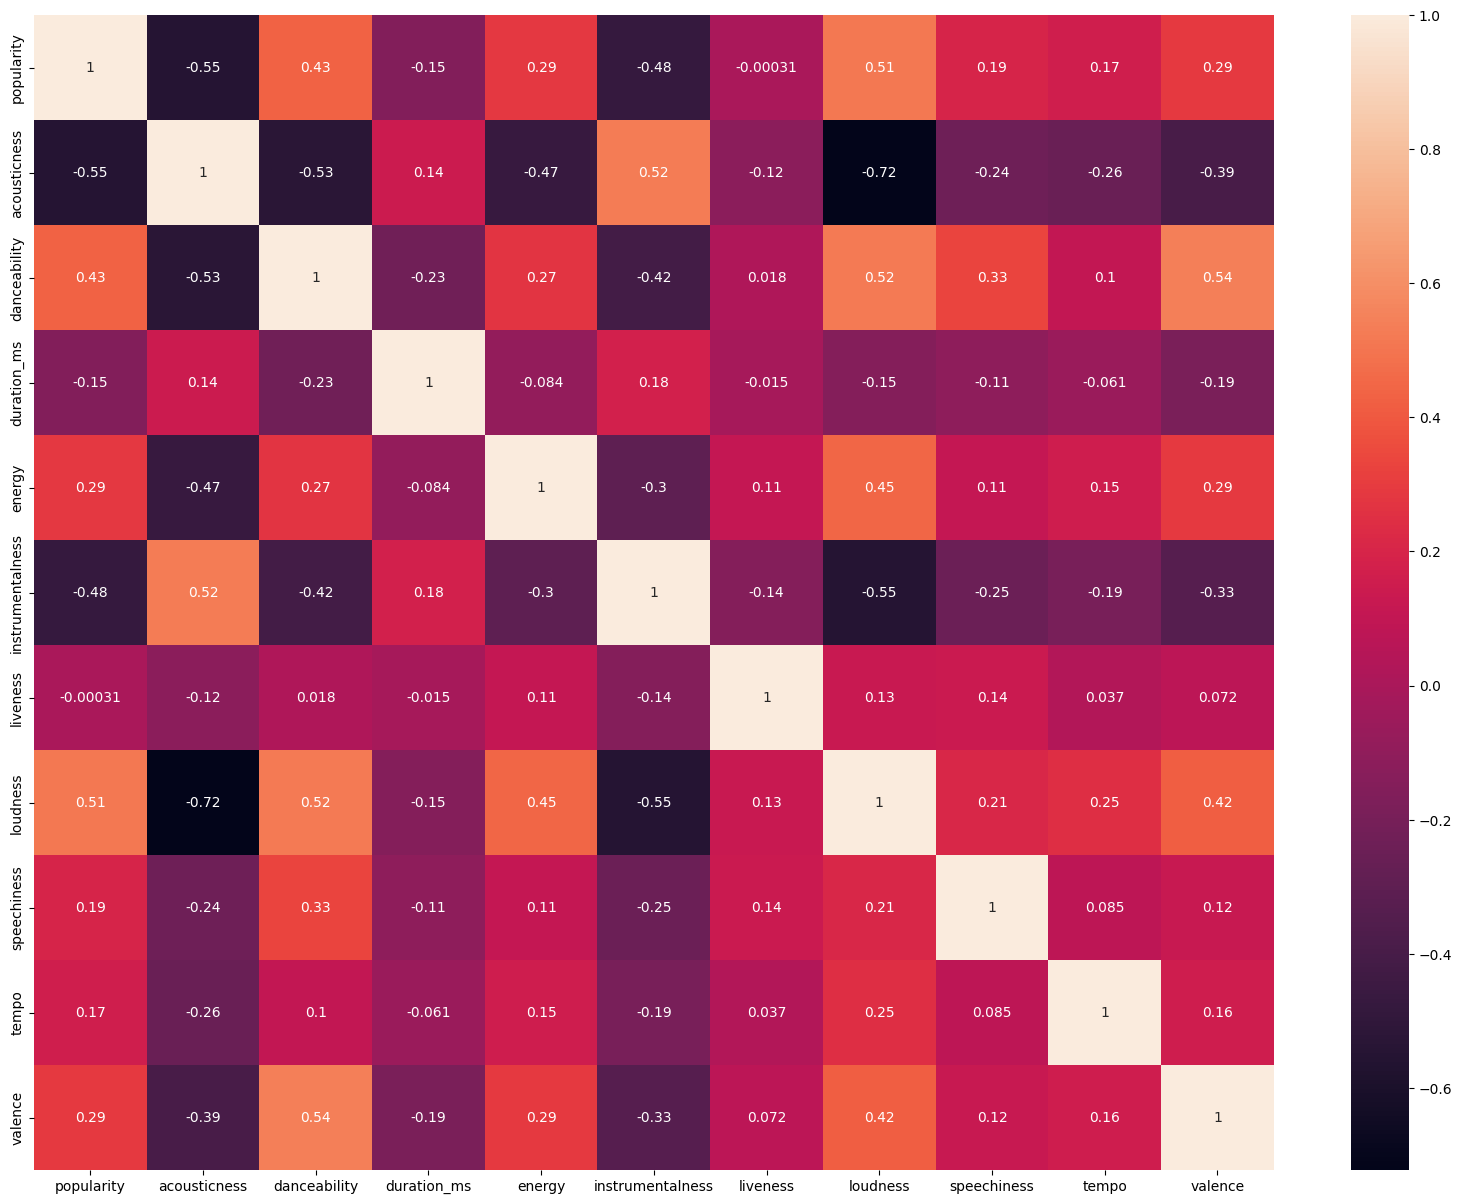

In [36]:
#plotting heatmap to find correlation
corr = df2.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corr,annot = True)
plt.show()

In [37]:
corr['popularity'].sort_values(ascending = False)

popularity          1.000000
loudness            0.512240
danceability        0.432430
valence             0.290707
energy              0.285929
speechiness         0.194049
tempo               0.165131
liveness           -0.000315
duration_ms        -0.152089
instrumentalness   -0.478397
acousticness       -0.549833
Name: popularity, dtype: float64

Encoding


In [38]:
categorical_features

['track_name',
 'key',
 'voice_gender',
 'mode',
 'musician_category',
 'music_genre']

In [39]:
## Finding Unique values
for feature in categorical_features:
    print(feature ,":",df[feature].nunique())

track_name : 14799
key : 12
voice_gender : 4
mode : 3
musician_category : 4
music_genre : 7


In [40]:
df.drop(['track_name'],axis =1,inplace = True)

In [41]:
df.key.value_counts()

Scale C          1771
Scale G          1730
Scale D          1695
Scale C Sharp    1633
Scale A          1479
Scale F          1419
Scale E          1210
Scale A Sharp    1142
Scale B          1059
Scale G Sharp    1023
Scale F Sharp     916
Scale D Sharp     604
Name: key, dtype: int64

In [42]:
##onehotencoding on 'key','voice_gender','mode','musician_category','music_genre'
from numpy import int32
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,dtype=int32,drop = 'first')
cols = df[['key',
 'voice_gender',
 'mode',
 'musician_category',
 'music_genre']]
onehot_encoded = ohe.fit_transform(cols)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
# Get the feature names
feature_names = ohe.get_feature_names_out(['key',
 'voice_gender',
 'mode',
 'musician_category',
 'music_genre'])
# Create a new DataFrame with the encoded data and feature names
df_encoded = pd.DataFrame(onehot_encoded, columns=feature_names)
# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df, df_encoded], axis=1)
# Droping columns 'key','voice_gender','mode','musician_category','music_genre'
df.drop(['key',
 'voice_gender',
 'mode',
 'musician_category',
 'music_genre'],axis=1,inplace=True)

In [44]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,mode_missing,musician_category_Duet,musician_category_Solo,musician_category_missing,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,0.147134,-14.140,0.046404,143.788,...,0,0,0,0,0,0,0,1,0,0
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000030,0.174655,-13.716,0.039949,113.108,...,1,0,0,0,0,0,0,1,0,0
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,0.042030,-4.995,0.119917,105.018,...,0,0,0,0,0,0,0,0,1,0
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,0.124637,-4.262,0.167493,113.108,...,0,1,0,0,0,0,0,0,0,1
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,0.134782,-26.922,0.039139,112.183,...,0,0,0,0,0,0,0,0,0,0


Feature Scaling

In [45]:
# Using standardScalar for Scaling

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
cols = df[['duration_ms','tempo']]
scaled = scalar.fit_transform(cols)


## Droping unscaled columns
df.drop(['duration_ms','tempo'],axis =1,inplace = True)
# Create a new DataFrame with the encoded data and feature names
scaled_col = pd.DataFrame(scaled, columns=['duration_ms','tempo'])
# Concatenate the original DataFrame and the encoded DataFrame
df = pd.concat([df, scaled_col], axis=1)

In [46]:
df.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,key_Scale A Sharp,...,musician_category_Solo,musician_category_missing,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,duration_ms,tempo
0,49.178,0.970522,0.580508,0.192107,0.000000,0.147134,-14.140,0.046404,0.598965,0,...,0,0,0,0,0,1,0,0,-0.213001,0.980510
1,59.827,1.009380,0.687542,0.265942,0.000030,0.174655,-13.716,0.039949,0.357194,0,...,0,0,0,0,0,1,0,0,-0.202727,-0.072762
2,89.023,0.020041,0.967948,0.857411,0.000000,0.042030,-4.995,0.119917,0.635525,0,...,0,0,0,0,0,0,1,0,0.162349,-0.350498
3,55.762,0.010284,0.616287,0.970513,0.000220,0.124637,-4.262,0.167493,0.983750,0,...,0,0,0,0,0,0,0,1,-0.375680,-0.072762
4,45.095,0.858769,0.280645,0.114732,0.002753,0.134782,-26.922,0.039139,0.074412,0,...,0,0,0,0,0,0,0,0,1.037406,-0.104518


Model Selection

In [47]:
x=df.drop(['popularity'],axis=1)
y=df['popularity']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lin_reg = LinearRegression()
model = lin_reg.fit(x_train,y_train)

In [51]:
predictions = model.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE = ',mean_squared_error(y_test,predictions))
print('R squared value =',r2_score(y_test,predictions))

MSE =  116.13436778547597
R squared value = 0.6050686668543652


In [53]:
predictions

array([65.08424121, 65.90124194, 33.87855179, ..., 61.58589061,
       33.0459267 , 32.82583509])

In [57]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV


# Create a Lasso regression model
lasso = Lasso()

# Define a range of alpha values to search over (alpha controls the strength of regularization)
alpha_values = np.logspace(-6, 6, 100)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'alpha': alpha_values
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(lasso, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)

# Perform the random search to find the best hyperparameters
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_alpha = random_search.best_params_['alpha']

# Create the final Lasso regression model with the best alpha
lasso = Lasso(alpha=best_alpha)
model1 = lasso.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Alpha:", best_alpha)
print("Best Score:", random_search.best_score_)


Best Alpha: 0.00572236765935022
Best Score: 0.5962804477535328


In [58]:
best_random = random_search.best_estimator_
best_random

Lasso(alpha=0.00572236765935022)

In [63]:
random_search.best_params_

{'alpha': 0.00572236765935022}

In [61]:
predictions1 = model1.predict(x_test)

In [62]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE = ',mean_squared_error(y_test,predictions1))
print('R squared value =',r2_score(y_test,predictions1))

MSE =  116.11108483818404
R squared value = 0.6051478438076556


In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Create a Ridge regression model
ridge = Ridge()

# Define a range of alpha values to search over (alpha controls the strength of regularization)
alpha_values = np.logspace(-6, 6, 100)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'alpha': alpha_values
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(ridge, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)

# Perform the random search to find the best hyperparameters
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_alpha = random_search.best_params_['alpha']

# Create the final Ridge regression model with the best alpha
ridge = Ridge(alpha=best_alpha)
model2 = ridge.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Alpha:", best_alpha)
print("Best Score:", random_search.best_score_)


Best Alpha: 0.2848035868435805
Best Score: 0.5961001496065927


In [68]:
best_random = random_search.best_estimator_
best_random

Ridge(alpha=0.2848035868435805)

In [69]:
predictions2 = model2.predict(x_test)

In [70]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE = ',mean_squared_error(y_test,predictions2))
print('R squared value =',r2_score(y_test,predictions2))

MSE =  116.13625782375809
R squared value = 0.6050622395120315
